reading...  data.txt
calculating...
data:  [(0.0, 0.0), (0.1, 0.2), (0.9, 0.9), (1.0, 0.9)]
plotting...


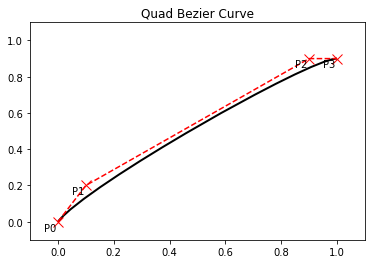

done!


In [25]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import csv
import os
                 
file_name = 'data.txt'
dir_path = os.getcwd()
file_path = os.path.join(dir_path, file_name)

try:
    with open(file_path, 'r') as file:
        print('reading... ', file_name)
        data = list(csv.reader(file, delimiter=';'))
        if not data:
            print("no data in file: ", file_name)
        else:
            print("calculating...")
            
            Path = mpath.Path  
            data = [(float(x), float(y)) for x,y in data]
            print('data: ',data)
            
            codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
            path = Path(data, codes)
            fig, ax = plt.subplots()
            patch = mpatches.PathPatch(path, facecolor='none', lw=2, transform=ax.transData)
            xp, yp = zip(*data)
            ax.plot(xp,yp, 'x--',2,color='red',ms=10)
            ax.add_patch(patch)
            for i, p in enumerate(data):
                ax.text(p[0]-0.05,p[1]-0.05,'P'+str(i))
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            # ax.vlines(xp, -0.09,yp,linestyle="dashed",lw=2)
            # ax.hlines(yp, -0.09,xp, linestyle="dashed",lw=2)
           
            ax.set_title('Quad Bezier Curve')
            print('plotting...')
            plt.show()
            
except IOError:
    print("Could not read file: ", file_name)
    
print('done!')